In [1]:
import sys
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import jax

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
jax.config.update('jax_enable_x64', True)

sys.path.append('/home/iiyama/src/qite')
from qite.qite import qite
from qite.z2lgt_1d import hamiltonian, domain_of

logging.basicConfig(level=logging.WARNING)
logging.getLogger('qite.qite').setLevel(logging.INFO)

In [2]:
ham = hamiltonian(num_sites=4, mass=0.5, coupling=1.2)

# Exactly diagonalize and set the initial state as (|0> + |1>) / sqrt(2)
evals, evecs = np.linalg.eigh(ham.to_matrix())
initial_state = (evecs[:, 0] + evecs[:, 1]) * np.sqrt(0.5)

state, energies = qite(ham, [domain_of(hterm) for hterm in ham], initial_state, delta_beta=0.01,
                       num_steps=100, solver_params={'solver': 'minres', 'rtol': 1.e-8})

INFO:qite.qite:QITE step 0
INFO:qite.qite:QITE step 1
INFO:qite.qite:QITE step 2
INFO:qite.qite:QITE step 3
INFO:qite.qite:QITE step 4
INFO:qite.qite:QITE step 5
INFO:qite.qite:QITE step 6
INFO:qite.qite:QITE step 7
INFO:qite.qite:QITE step 8
INFO:qite.qite:QITE step 9
INFO:qite.qite:QITE step 10
INFO:qite.qite:QITE step 11
INFO:qite.qite:QITE step 12
INFO:qite.qite:QITE step 13
INFO:qite.qite:QITE step 14
INFO:qite.qite:QITE step 15
INFO:qite.qite:QITE step 16
INFO:qite.qite:QITE step 17
INFO:qite.qite:QITE step 18
INFO:qite.qite:QITE step 19
INFO:qite.qite:QITE step 20
INFO:qite.qite:QITE step 21
INFO:qite.qite:QITE step 22
INFO:qite.qite:QITE step 23
INFO:qite.qite:QITE step 24
INFO:qite.qite:QITE step 25
INFO:qite.qite:QITE step 26
INFO:qite.qite:QITE step 27
INFO:qite.qite:QITE step 28
INFO:qite.qite:QITE step 29
INFO:qite.qite:QITE step 30
INFO:qite.qite:QITE step 31
INFO:qite.qite:QITE step 32
INFO:qite.qite:QITE step 33
INFO:qite.qite:QITE step 34
INFO:qite.qite:QITE step 35
IN

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


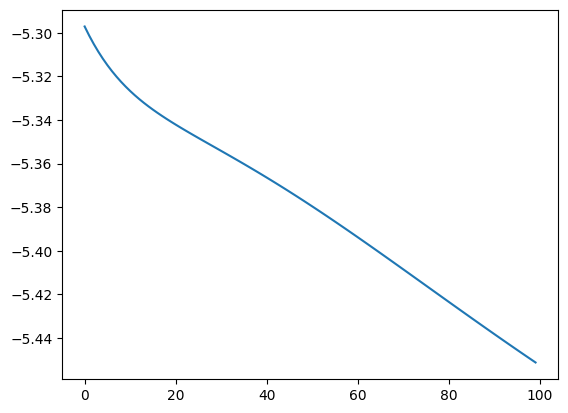

In [3]:
plt.plot(energies)